## агломеративная кластеризация с нормализацией

In [235]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


In [429]:
data = pd.read_csv("all_eda_obr20_04-1.csv",low_memory=False)
data.shape

(21566, 107)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21566 entries, 0 to 21565
Columns: 107 entries, Unnamed: 0 to STOR_bin
dtypes: float64(93), int64(13), object(1)
memory usage: 17.6+ MB


In [99]:
columns =list(data.columns)
columns

['Unnamed: 0',
 'StuckPipe',
 'DEPT',
 'HDTH',
 'BPOS',
 'HKLD',
 'STOR',
 'FLWI',
 'RPM',
 'SPPA',
 'ECD',
 'DLS',
 'INCL',
 'AZIM',
 'GR',
 'APRS',
 'BVEL',
 'RIG_STATE',
 'ESD',
 'hole',
 'DDEPT',
 'Stick',
 'DDEPT_1',
 'DDEPT_3',
 'DDEPT_6',
 'DDEPT_12',
 'DDEPT_18',
 'FDEPT_1',
 'FDEPT_3',
 'DBPOS',
 'DBPOS_1',
 'DBPOS_3',
 'DBPOS_6',
 'DBPOS_12',
 'DBPOS_18',
 'FBPOS_1',
 'FBPOS_3',
 'DHKLD',
 'DHKLD_1',
 'DHKLD_3',
 'DHKLD_6',
 'DHKLD_12',
 'DHKLD_18',
 'FHKLD_1',
 'FHKLD_3',
 'DSPPA',
 'DSPPA_1',
 'DSPPA_3',
 'DSPPA_6',
 'DSPPA_12',
 'DSPPA_18',
 'FSPPA_1',
 'FSPPA_3',
 'DRPM',
 'DRPM_1',
 'DRPM_3',
 'DRPM_6',
 'DRPM_12',
 'DRPM_18',
 'FRPM_1',
 'FRPM_3',
 'DBVEL',
 'DBVEL_1',
 'DBVEL_3',
 'DBVEL_6',
 'DBVEL_12',
 'DBVEL_18',
 'FBVEL_1',
 'FBVEL_3',
 'DSTOR_1',
 'DSTOR_3',
 'DSTOR_6',
 'DSTOR_12',
 'DSTOR_18',
 'FSTOR_1',
 'FSTOR_3',
 'SPPA_APRS',
 'DSPPA_APRS_1',
 'DSPPA_APRS_3',
 'DSPPA_APRS_6',
 'DSPPA_APRS_12',
 'DSPPA_APRS_18',
 'FSPPA_APRS_1',
 'FSPPA_APRS_3',
 'DECD',
 '

In [115]:
data.corr()

,Unnamed: 0,StuckPipe,DEPT,HDTH,BPOS,HKLD,STOR,FLWI,RPM,SPPA,...,conner_delta,GR_type,DEPT_bin,SPPA_bin,SPPA_APRS_bin,BVEL_bin,HKLD_bin,BPOS_bin,RPM_bin,STOR_bin
Unnamed: 0,1.000000,0.000267,-0.326486,0.336884,-0.096534,-0.036903,0.009780,0.285509,0.031043,-0.125742,...,-0.125286,0.011764,0.016904,0.069276,0.046616,0.043310,-0.028400,-0.059969,0.032322,0.020620
StuckPipe,0.000267,1.000000,-0.003871,-0.008476,0.239441,0.029008,0.176132,0.055299,0.113125,0.148844,...,-0.012589,0.099503,0.103990,-0.046370,-0.045453,0.118066,0.018987,0.086898,-0.026274,-0.053825
DEPT,-0.326486,-0.003871,1.000000,0.144609,0.002822,-0.088371,0.073381,-0.208823,-0.079092,0.044882,...,0.098913,-0.022783,-0.011244,-0.006701,-0.001551,0.068940,0.061876,0.038935,0.032588,0.061281
HDTH,0.336884,-0.008476,0.144609,1.000000,-0.099525,-0.131430,0.011264,0.388156,0.178397,0.066823,...,-0.105595,-0.001918,-0.127703,0.062564,0.045812,0.022693,0.064012,-0.169458,0.037799,0.145223
BPOS,-0.096534,0.239441,0.002822,-0.099525,1.000000,0.234853,0.220594,0.109968,0.259381,0.318645,...,-0.034939,0.165002,0.059758,-0.016251,-0.001550,0.131224,0.050774,-0.172361,-0.032497,-0.063160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BVEL_bin,0.043310,0.118066,0.068940,0.022693,0.131224,0.021627,0.100892,0.007090,0.052449,0.099335,...,0.060371,-0.022944,0.158825,-0.010896,-0.050316,1.000000,0.177126,-0.052367,0.079193,0.045216
HKLD_bin,-0.028400,0.018987,0.061876,0.064012,0.050774,-0.041613,-0.168117,-0.202009,-0.219596,-0.163734,...,0.007982,-0.077894,0.091183,0.078267,0.075972,0.177126,1.000000,0.150464,0.111232,0.290202
BPOS_bin,-0.059969,0.086898,0.038935,-0.169458,-0.172361,-0.327921,-0.459411,-0.558469,-0.645499,-0.549480,...,0.094746,-0.318711,0.055624,0.213072,0.209935,-0.052367,0.150464,1.000000,0.177359,0.231219
RPM_bin,0.032322,-0.026274,0.032588,0.037799,-0.032497,-0.240918,-0.206060,-0.141626,-0.161436,-0.170586,...,-0.007349,-0.099914,-0.008808,0.088817,0.020777,0.079193,0.111232,0.177359,1.000000,0.329164


<AxesSubplot:>

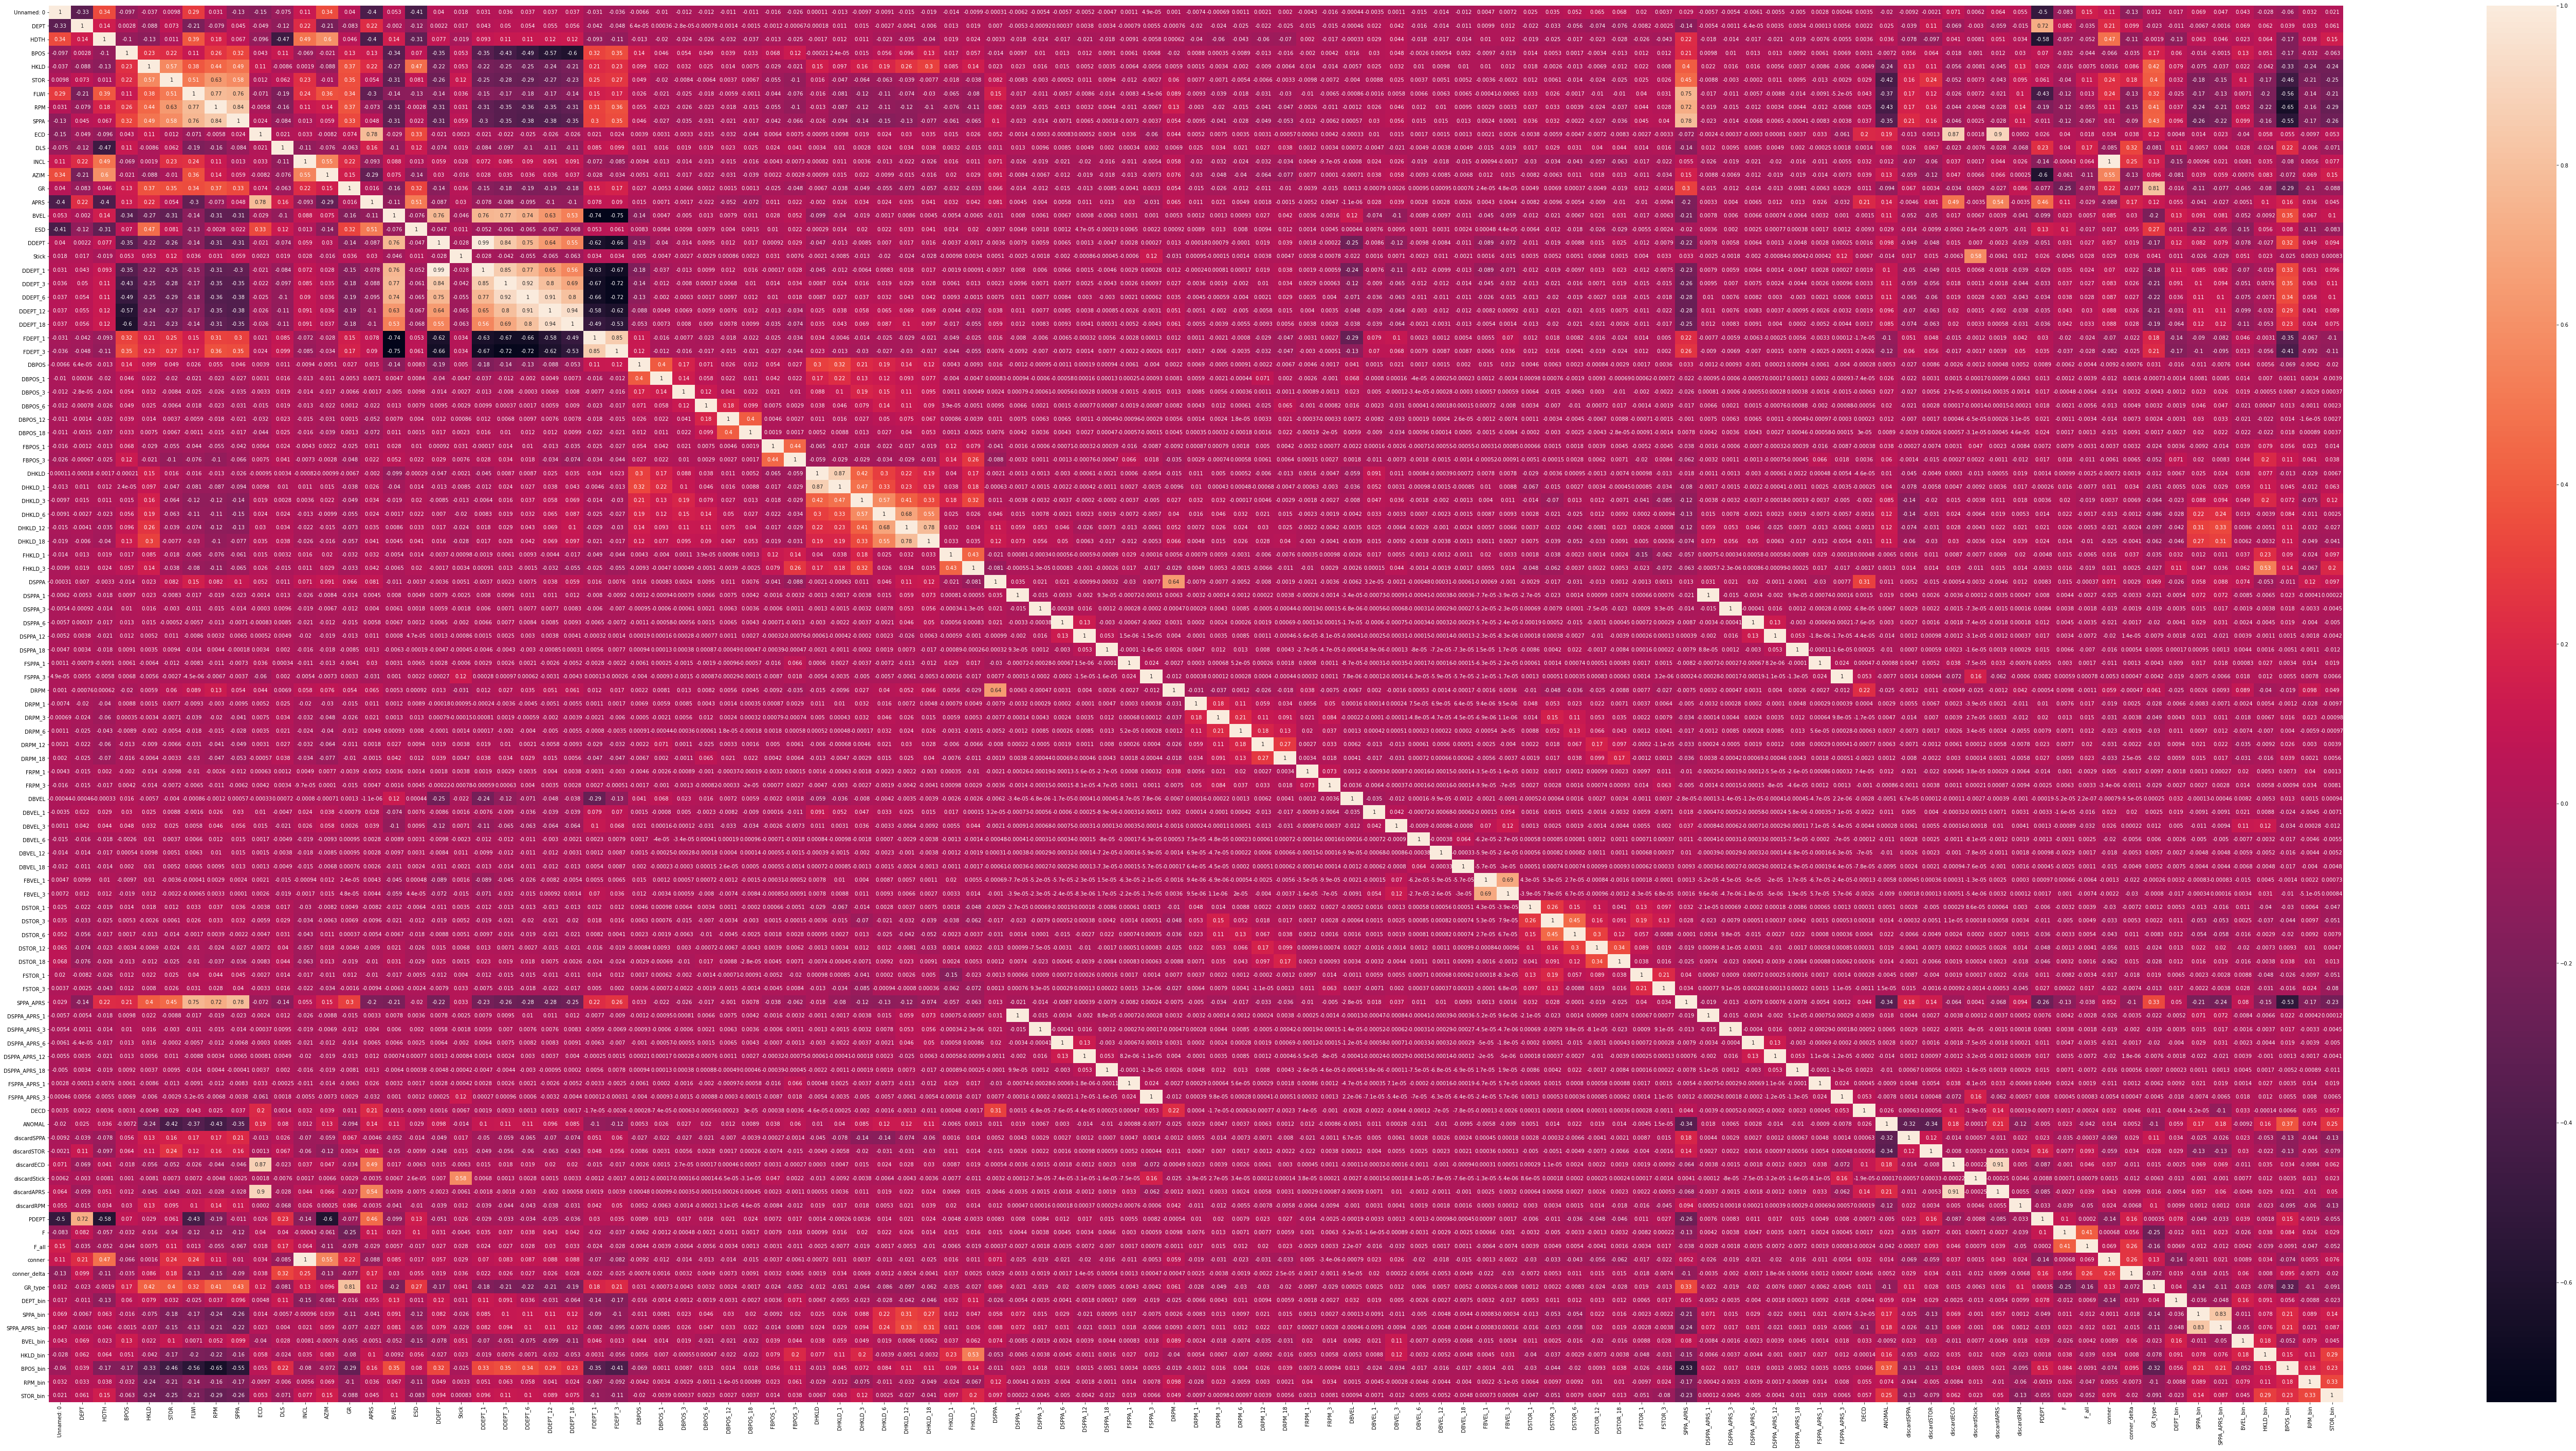

In [162]:
Var_Corr = data[['Unnamed: 0', 'DEPT', 'HDTH', 'BPOS', 'HKLD',#'StuckPipe',
 'STOR', 'FLWI', 'RPM', 'SPPA',
 'ECD', 'DLS', 'INCL',
 'AZIM', 'GR', 'APRS', 'BVEL', 'ESD', #'hole',
 'DDEPT', 'Stick', 'DDEPT_1',
 'DDEPT_3', 'DDEPT_6', 'DDEPT_12',
 'DDEPT_18', 'FDEPT_1', 'FDEPT_3',
 'DBPOS', 'DBPOS_1', 'DBPOS_3',
 'DBPOS_6', 'DBPOS_12',
 'DBPOS_18', 'FBPOS_1', 'FBPOS_3', 'DHKLD',
 'DHKLD_1', 'DHKLD_3',
 'DHKLD_6', 'DHKLD_12', 'DHKLD_18',
 'FHKLD_1', 'FHKLD_3', 'DSPPA',
 'DSPPA_1', 'DSPPA_3', 'DSPPA_6', 'DSPPA_12',
 'DSPPA_18', 'FSPPA_1', 'FSPPA_3', 'DRPM',
 'DRPM_1', 'DRPM_3', 'DRPM_6',
 'DRPM_12', 'DRPM_18', 'FRPM_1', 'FRPM_3', 'DBVEL',
 'DBVEL_1', 'DBVEL_3', 'DBVEL_6', 'DBVEL_12', 'DBVEL_18', 'FBVEL_1',
 'FBVEL_3', 'DSTOR_1', 'DSTOR_3', 'DSTOR_6', 'DSTOR_12', 'DSTOR_18',
 'FSTOR_1', 'FSTOR_3', 'SPPA_APRS',
 'DSPPA_APRS_1', 'DSPPA_APRS_3', 'DSPPA_APRS_6', 'DSPPA_APRS_12', 'DSPPA_APRS_18',
 'FSPPA_APRS_1', 'FSPPA_APRS_3', 'DECD',
 'ANOMAL',# 'TimeU',
 'discardSPPA', 'discardSTOR', 'discardECD',
 'discardStick', 'discardAPRS', 'discardRPM', 'PDEPT', 'F',
 'F_all', 'conner', 'conner_delta',
 'GR_type', 'DEPT_bin',
 'SPPA_bin', 'SPPA_APRS_bin', 'BVEL_bin',
 'HKLD_bin', 'BPOS_bin',
 'RPM_bin', 'STOR_bin']].corr()
# plot the heatmap and annotation on it
plt.figure(figsize = (400,200))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)



## попробуем сделать кластеризацию по 'RIG_STATE'=7 

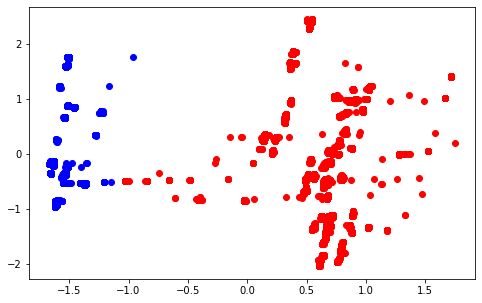

In [301]:
# Вариант с StandardScaler нормализацией: (можно другие варианты)
# Комбинации признаков пробовались самые разные.
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
data1 =  data[data['RIG_STATE']==7]

dfd = data1[[#"BPOS",  "STOR",  "AZIM", "SPPA" #,# "ANOMAL",#"F", #"F_all" ,
 'DEPT_bin', 'SPPA_bin', 'SPPA_APRS_bin',
       'BVEL_bin', 'HKLD_bin', 'BPOS_bin', 'RPM_bin', 'STOR_bin',
        "DEPT", "HDTH", "BPOS", "HKLD","STOR", "FLWI", "RPM", "SPPA"   ]]
df2 = dfd.values
# Можно добавить PCA:
# reduce to 2 importants features
pca = PCA(n_components=2)
df2 = pca.fit_transform(df2)

scaler.fit(df2)
samples_scaled = scaler.transform(df2)
agg_clustering = AgglomerativeClustering(n_clusters = 2, 
                                         affinity = 'euclidean', linkage = 'ward')
#predicting the labels
labels = agg_clustering.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
#plt.scatter(df[labels == 2 , 0] , df[labels == 2 , 1] , c = 'green')
#plt.scatter(df[labels == 3 , 0] , df[labels == 3 , 1] , c = 'black')
#plt.scatter(df[labels == 4 , 0] , df[labels == 4 , 1] , c = 'yellow')
plt.show()

In [302]:
samples_scaled.shape

(10669, 2)

In [303]:
# считаем кол-во предсказанных "Аварий":
len(samples_scaled[labels == 1])

2914

In [304]:
data.hole.unique()

array(['204', '210ST', '210ST2', '216', '217ST1', '217ST2', '220',
       '220ST3', '220ST4', '234ST2', '241', '243', '256ST2', '256ST3',
       '278', '279'], dtype=object)

## Вариант с Normalizer нормализацией: (получается вроде ЛУЧШЕ, но странно: кластеризация есть, но не совпадает с уже размеченной).
## Пробовали разные комбинации признаков -особо картина не менялась.
## Пробовали делать кластеризацию на отдельных скважинах -особо картина не менялась, хотя результаты по скважинам рознятся.


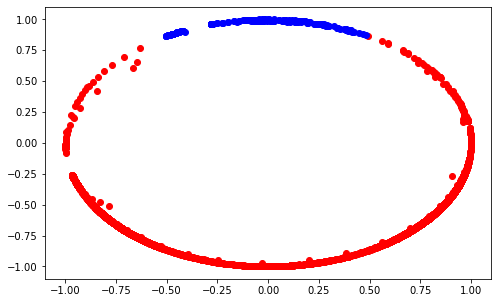

In [305]:
data = pd.read_csv("all_eda_obr20_04-1.csv")

scaler = Normalizer()
# scaler = MaxAbsScaler ()
data2 =  data[data['RIG_STATE']==7]
#data2 =  data2[data2['hole']=="255"]  #204/ 210ST2 (+) / 234ST2 варианты по скважинам

# Пробовал в разных комбинациях признаков:
df1 = data2[[ "HKLD", "STOR","FLWI","RPM", "SPPA", "ECD", "APRS",
            "BVEL", "DDEPT", "DHKLD", "F","F_all", 
             "SPPA_APRS","DSPPA"]].values #Константин вариант

df = data2[[ 
 'F_all', 'conner', 'conner_delta',
 'GR_type', 'DEPT_bin', 'SPPA_bin', 'SPPA_APRS_bin', 'BVEL_bin',
 'HKLD_bin', 'BPOS_bin', 'RPM_bin', 'STOR_bin']].values #Константин вариант new

df6 = data2[[ "HKLD", "STOR","FLWI","RPM", "SPPA", "ECD", "APRS",
            "BVEL", "DDEPT", "DHKLD", "F","F_all", "SPPA_APRS","DSPPA",
           "BPOS", "ANOMAL"]].values # Павел вариант

df3 = data2[[ "DDEPT_6", "DHKLD_1", "DDEPT_12",  "DDEPT_18", "DHKLD_6", 
            "DHKLD_18", "DHKLD_12","DHKLD_1", "FHKLD_1", "DSPPA_1", "DSPPA_3",
           "DSPPA", "FSPPA_1", "FBPOS_1"]].values # Татьяна вариант
 
df5 = data2[[  "DDEPT_6", "DHKLD_1", "DDEPT_12",  "DDEPT_18", "DHKLD_6", 
            "DHKLD_18", "DHKLD_12","DHKLD_1", "FHKLD_1", "DSPPA_1", "DSPPA_3",
           "DSPPA", "FSPPA_1", "FBPOS_1",
    'DEPT_bin', 'SPPA_bin', 'SPPA_APRS_bin',
       'BVEL_bin', 'HKLD_bin', 'BPOS_bin', 'RPM_bin', 'STOR_bin',
        "DEPT", "HDTH", "BPOS", "HKLD","STOR", "FLWI", "RPM", "SPPA"
           ]].values
        
df9 = data2[[ 'Unnamed: 0', 'DEPT', 'HDTH', 'BPOS', 'HKLD',#'StuckPipe',
 'STOR', 'FLWI', 'RPM', 'SPPA',
 'ECD', 'DLS', 'INCL',
 'AZIM', 'GR', 'APRS', 'BVEL', 'ESD', #'hole',
 'DDEPT', 'Stick', 'DDEPT_1',
 'DDEPT_3', 'DDEPT_6', 'DDEPT_12',
 'DDEPT_18', 'FDEPT_1', 'FDEPT_3',
 'DBPOS', 'DBPOS_1', 'DBPOS_3',
 'DBPOS_6', 'DBPOS_12',
 'DBPOS_18', 'FBPOS_1', 'FBPOS_3', 'DHKLD',
 'DHKLD_1', 'DHKLD_3',
 'DHKLD_6', 'DHKLD_12', 'DHKLD_18',
 'FHKLD_1', 'FHKLD_3', 'DSPPA',
 'DSPPA_1', 'DSPPA_3', 'DSPPA_6', 'DSPPA_12',
 'DSPPA_18', 'FSPPA_1', 'FSPPA_3', 'DRPM',
 'DRPM_1', 'DRPM_3', 'DRPM_6',
 'DRPM_12', 'DRPM_18', 'FRPM_1', 'FRPM_3', 'DBVEL',
 'DBVEL_1', 'DBVEL_3', 'DBVEL_6', 'DBVEL_12', 'DBVEL_18', 'FBVEL_1',
 'FBVEL_3', 'DSTOR_1', 'DSTOR_3', 'DSTOR_6', 'DSTOR_12', 'DSTOR_18',
 'FSTOR_1', 'FSTOR_3', 'SPPA_APRS',
 'DSPPA_APRS_1', 'DSPPA_APRS_3', 'DSPPA_APRS_6', 'DSPPA_APRS_12', 'DSPPA_APRS_18',
 'FSPPA_APRS_1', 'FSPPA_APRS_3', 'DECD',
 'ANOMAL',# 'TimeU',
 'discardSPPA', 'discardSTOR', 'discardECD',
 'discardStick', 'discardAPRS', 'discardRPM', 'PDEPT', 'F',
 'F_all', 'conner', 'conner_delta',
 'GR_type', 'DEPT_bin',
 'SPPA_bin', 'SPPA_APRS_bin', 'BVEL_bin',
 'HKLD_bin', 'BPOS_bin',
 'RPM_bin', 'STOR_bin']].values

# reduce to 4 importants features
pca = PCA(n_components=4)
df = pca.fit_transform(df)

scaler.fit(df)

samples_scaled = scaler.transform(df)
agg_clustering = AgglomerativeClustering(n_clusters = 2, 
                                         affinity = 'euclidean', linkage = 'ward')
#predicting the labels
labels = agg_clustering.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [306]:
len(samples_scaled)

10669

In [308]:
# считаем кол-во Аварий:
len(samples_scaled[labels == 1])

2682

In [309]:
len(data2[data2['StuckPipe']==1])

445

In [310]:
data2['StuckPipe'] = data2['StuckPipe'].astype(int)
StuckPipe = data2['StuckPipe'].values

<ipython-input-310-95f26a2f7727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['StuckPipe'] = data2['StuckPipe'].astype(int)


In [312]:
import pandas as pd
dff = pd.DataFrame({'labels': labels,
'StuckPipe': StuckPipe})
dff.head()
#dff.shape

,labels,StuckPipe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [313]:
#ct = pd.crosstab(dff["labels"], data2['StuckPipe'])
#print(ct)

In [314]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(labels, data2['StuckPipe'])
print(ct)

StuckPipe     0    1
row_0               
0          7666  321
1          2558  124


Кластеризация разметила класс =1 и он не совпал с StuckPipe =1 

In [316]:
from sklearn import metrics
metrics.silhouette_score(samples_scaled, labels, metric='euclidean')

0.6068999968628093

однородность: каждый кластер содержит только членов одного класса.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

In [317]:
metrics.homogeneity_score(data2['StuckPipe'], labels)


0.00048537579080205613

полнота: все члены данного класса назначаются одному и тому же кластеру.

In [318]:
metrics.completeness_score(data2['StuckPipe'], labels)

0.00014921547783330438

Их гармоническое среднее, называемое V-мерой, вычисляется v_measure_score:

In [319]:
metrics.v_measure_score(data2['StuckPipe'], labels)

0.00022825898852655947

## Isolation Forest

In [321]:
outliers_fraction = 0.01
data2 =  data[data['RIG_STATE']==7]
#data2 =  data2[data2['hole']=="255"]  #204/ 210ST2 (+) / 234ST2 варианты по скважинам
df4 = data2[[ "HKLD", "STOR","FLWI","RPM", "SPPA", "ECD", "APRS"
           # "BVEL", "DDEPT", "DHKLD", "F","F_all", 
           #  "SPPA_APRS","DSPPA"
           ]]#.values   #Константин признаки

df = data2[[ "HKLD", "STOR","FLWI","RPM", "SPPA", "ECD", "APRS",
            "BVEL", "DDEPT", "DHKLD", "F","F_all", "SPPA_APRS","DSPPA",
           "BPOS", "ANOMAL"]]

scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(df)
data7 = pd.DataFrame(np_scaled)
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data7)

IsolationForest(contamination=0.01)

In [323]:
# add the data to the main  
df['anomaly25'] = pd.Series(model.predict(data7))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

0.0    4696
1.0      44
Name: anomaly25, dtype: int64


<ipython-input-323-8a504da46daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly25'] = pd.Series(model.predict(data7))
<ipython-input-323-8a504da46daf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )


In [324]:
ct = pd.crosstab(df['anomaly25'], data2['StuckPipe'])
print(ct)

StuckPipe   0.0  1.0
anomaly25           
0.0        4484  212
1.0          39    5


 ## 2. Кластеризация KMeans

In [432]:
#data = pd.read_csv("all_eda_obr4.csv")
#data = pd.read_csv("eda4_all_obr.csv")
data3 =  data[data['RIG_STATE']==7]
data4 =  data3[data3['hole']=="216"]
data4

,Unnamed: 0,StuckPipe,DEPT,HDTH,BPOS,HKLD,STOR,FLWI,RPM,SPPA,...,conner_delta,GR_type,DEPT_bin,SPPA_bin,SPPA_APRS_bin,BVEL_bin,HKLD_bin,BPOS_bin,RPM_bin,STOR_bin
5147,5147,0.0,4631.96340,5669.0664,2.13670,56.676400,23.300000,1809.46480,101.430,230.96330,...,0,1,0,0,0,1,1,0,0,0
5148,5148,0.0,4631.74758,5669.0664,2.35252,39.468508,8.991370,1809.79792,101.438,231.01254,...,0,1,0,0,0,0,0,0,0,0
5149,5149,0.0,4631.53176,5669.0664,2.56834,39.468508,8.991370,1810.13104,101.446,231.06178,...,0,1,0,0,0,1,0,0,0,0
5150,5150,0.0,4631.31594,5669.0664,2.78416,39.468508,8.991370,1810.46416,101.454,231.11102,...,0,1,0,0,0,0,0,0,0,0
5151,5151,0.0,4631.10012,5669.0664,2.99998,39.468508,8.991370,1810.79728,101.462,231.16026,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,5684,0.0,4338.85642,5669.0664,43.62798,42.955852,11.319194,1550.60318,79.680,228.00616,...,1,1,0,0,0,0,0,0,0,0
5685,5685,0.0,4338.85154,5669.0664,43.63286,42.955852,11.319194,1311.95566,58.380,222.34832,...,1,1,0,0,0,1,0,0,0,1
5686,5686,0.0,4338.84666,5669.0664,43.63774,42.955852,11.319194,1073.30814,37.080,216.69048,...,1,1,0,0,0,1,0,0,1,1
5687,5687,0.0,4338.84178,5669.0664,43.64262,42.955852,11.319194,834.66062,15.780,211.03264,...,1,1,0,0,0,0,0,1,0,0


In [452]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
#scaler = StandardScaler()
#scaler = MaxAbsScaler ()
scaler = Normalizer () 
data3 =  data[data['RIG_STATE']==7]
# data4 =  data3[data3['hole']=="216"]

df3 = data3[['DEPT_bin', 'SPPA_bin', 'SPPA_APRS_bin','BVEL_bin',
    "HKLD","STOR", "FLWI", "RPM", #"SPPA" ,
             #,  "ANOMAL" #, "ECD" 
         #  "APRS", "BVEL", "DDEPT", "DHKLD", #"F", "F_all", 
         #     "SPPA_APRS", "DSPPA", "BPOS", "ANOMAL"
        'DBVEL_12', 'DBVEL_18', 'FBVEL_1', 'DSTOR_1', 'DSTOR_3', 'DSTOR_6',
      'DSTOR_12', 'DSTOR_18', 'FSTOR_1', 'DECD', 'ANOMAL' ,
       'discardSPPA', 'discardSTOR', 'discardECD', 'discardStick',
       'discardAPRS', 'discardRPM', 'PDEPT', 'F', 'conner',
      'conner_delta', 'SPPA_APRS'#, 'GR_type'
           ]]#.values

df3 = data3[[     # Лучший результат на :      'HKLD', 'STOR',
                                   # 'FLWI', 'RPM', 'SPPA', 'ECD'!!!!!
      'HKLD', 'STOR',
       'FLWI', 'RPM', 'SPPA', 'ECD'#, 'DLS','BVEL','HDTH', 
        ]].values


# reduce to 2 importants features
#pca = PCA(n_components=2)
#df3 = pca.fit_transform(df3)
scaler.fit(df3)

samples_scaled = scaler.transform(df3)
# Fit model to points
model.fit(samples_scaled)


KMeans(n_clusters=2)

In [453]:
model.labels_

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

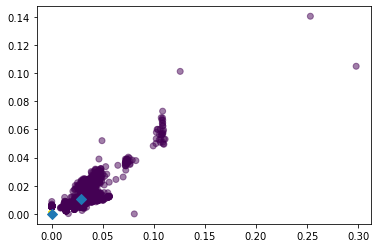

In [463]:

# Assign the columns of new_points: xs and ys
xs = samples_scaled[:,0]
ys = samples_scaled[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter (xs,ys, c=labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker='D', s=50)
plt.show()

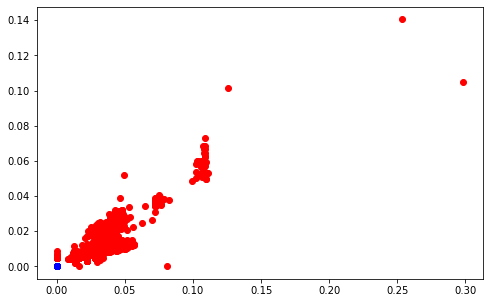

In [455]:
labels = model.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [456]:
# показатель плотности (чем меньше, тем лучше):
print(model.inertia_)

17.110279286001152


In [460]:
data3['StuckPipe'] = data3['StuckPipe'].astype(int)
StuckPipe = data3['StuckPipe'].values

<ipython-input-460-7bf83b22f372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['StuckPipe'] = data3['StuckPipe'].astype(int)


In [461]:
dff = pd.DataFrame({'labels': labels,
'StuckPipe': StuckPipe})
dff.head()

,labels,StuckPipe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [462]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(model.labels_, data3['StuckPipe'])
print(ct)

StuckPipe      0    1
row_0                
0          10032  445
1            192    0


In [443]:
from sklearn import metrics
metrics.silhouette_score(samples_scaled, labels, metric='euclidean')

0.9418721344132789

## график показывает, что оптимальным кол-вом кластеров для наших данных было бы: 

<ipython-input-68-30e39691cf59>:9: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  model.fit(samples_scaled)
<ipython-input-68-30e39691cf59>:9: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  model.fit(samples_scaled)


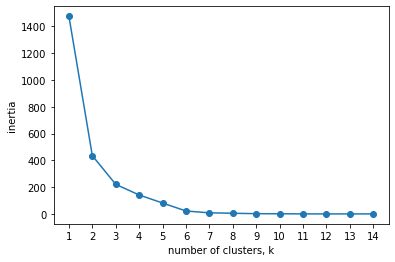

In [68]:
ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## попробуем сделать кластеризацию по 'RIG_STATE'=7 и 'RIG_STATE'=1

In [404]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
#scaler = StandardScaler()
#scaler = MaxAbsScaler ()
scaler = Normalizer () 
#data2 =  data[(data['RIG_STATE']==7)]
data4 =  data[(data['RIG_STATE']==7)|(data['RIG_STATE']==1)]
#df3 = df.loc[(df.hole==hole)&((df.RIG_STATE==7.0)|(df.RIG_STATE==1.0))]
# F, F_all, SPPA_APRS, DSPPA, BPOS, ANOMAL
df4 = data4[[   
        'HKLD', 'STOR',
       'FLWI', 'RPM', 'SPPA', 'ECD']]

scaler.fit(df4)

samples_scaled = scaler.transform(df4)
# Fit model to points
model.fit(samples_scaled)


KMeans(n_clusters=2)

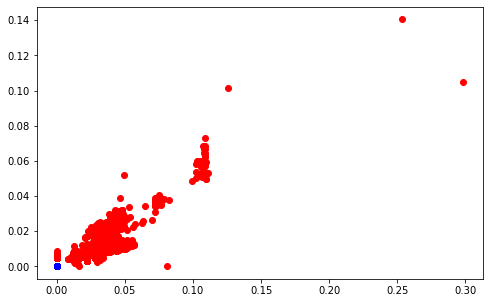

In [405]:
labels = model.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [406]:
data4['StuckPipe'] = data4['StuckPipe'].astype(int)
StuckPipe = data4['StuckPipe'].values

dff = pd.DataFrame({'labels': model.labels_,
'StuckPipe': StuckPipe})
dff.head()

<ipython-input-406-a4788ab04e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['StuckPipe'] = data4['StuckPipe'].astype(int)


,labels,StuckPipe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [407]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(labels, data4['StuckPipe'])
print(ct)

StuckPipe      0    1
row_0                
0          10074  458
1            192    0


In [408]:
# показатель плотности (чем меньше, тем лучше):
print(model.inertia_)

17.2132068472906


## Пробуем сделать кластеризацию по этапу бурения 'RIG_STATE']==1:

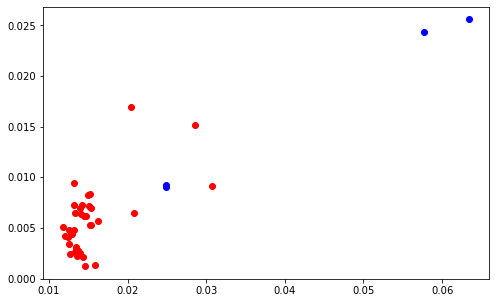

In [409]:
# Пробуем сделать кластеризацию по этапу бурения 'RIG_STATE']==1:

from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
#scaler = StandardScaler()
#scaler = MaxAbsScaler ()
scaler = Normalizer () 
data5 =  data[data['RIG_STATE']==1]
# F, F_all, SPPA_APRS, DSPPA, BPOS, ANOMAL
df = data5[[   
    'ESD', 'FBPOS_1',
       'FDEPT_1', 'FHKLD_1', 'FLWI', 'FSPPA_1', 'FSTOR_1', 'GR', 'HDTH',
       'HKLD', 'INCL', 'RIG_STATE', 'RPM', 'SPPA', 'STOR', 
       'StuckPipe',
       'Stick', 'ANOMAL', 'discardSPPA', 'discardSTOR', 'discardECD',
       'discardStick', 'discardAPRS', 'discardRPM', 'PDEPT', #, 'F', 'F_all',
       'conner', 'conner_delta', 'SPPA_APRS', 'GR_type' ]].values # Интересно!!

df5 = data5[[   
   'DEPT_bin', 'SPPA_bin', 'SPPA_APRS_bin','BVEL_bin' ]].values # 


df5 = data5[[ 'HKLD', 'STOR',
       'FLWI', 'RPM', 'SPPA', 'ECD']]
scaler.fit(df5)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(df5)
# Fit model to points
model.fit(samples_scaled)

labels = model.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [410]:
data5['StuckPipe'] = data5['StuckPipe'].astype(int)
StuckPipe = data5['StuckPipe'].values

dff = pd.DataFrame({'labels': labels,
'StuckPipe': StuckPipe})
dff.head()

<ipython-input-410-684c8e8c7718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['StuckPipe'] = data5['StuckPipe'].astype(int)


,labels,StuckPipe
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [411]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(labels, data5['StuckPipe'])
print(ct)

StuckPipe   0   1
row_0            
0          41  10
1           1   3


In [412]:
# показатель плотности (чем меньше, тем лучше):
print(model.inertia_)

0.006268073186930332


In [414]:
data5.StuckPipe.value_counts()

0    42
1    13
Name: StuckPipe, dtype: int64

## проверк гипотезы о плохой ЕДА на сырых данных 1 скважины:

In [465]:
#data = pd.read_csv("all_eda_obr4.csv")
data = pd.read_excel("216-1.xlsx")
#data77 = pd.read_excel ("210ST2-3.xlsx" )
#data = pd.read_csv("eda4_all_obr.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         73 non-null     datetime64[ns]
 1   StuckPipe         5 non-null      float64       
 2   TVD               73 non-null     float64       
 3   DEPT              73 non-null     float64       
 4   CDEPTH            73 non-null     float64       
 5   HDTH              73 non-null     float64       
 6   BPOS              73 non-null     float64       
 7   HKLD              73 non-null     float64       
 8   STOR              73 non-null     float64       
 9   FLWI              73 non-null     float64       
 10  RPM               73 non-null     float64       
 11  SPPA              73 non-null     float64       
 12  ECD               73 non-null     float64       
 13  DLS               73 non-null     float64       
 14  INCL              73 non-nul

In [466]:
data['RIG_STATE'].unique()

array([12,  2, 10, 11,  7,  3, 14,  4])

In [467]:
data['StuckPipe']=data['StuckPipe'].fillna(0)

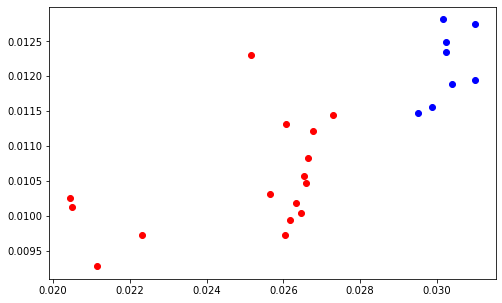

In [479]:
scaler = Normalizer()
data1 =  data[data['RIG_STATE']==7]

#data2 =  data2[data2['hole']=="255"]  #204/ 210ST2 (+) / 234ST2

#df = data[["HKLD", "STOR", "FLWI", "RPM", "SPPA", "ECD", 
      #      "APRS", "BVEL", "DDEPT", "DHKLD", #"F", "F_all", 
     #         "SPPA_APRS", "DSPPA", "BPOS", "ANOMAL" ]].values

df = data1[[ #'RPM', 'SPPA', 'BPOS',"STOR"
            'HKLD', 'STOR',    'FLWI', 'RPM', 'SPPA', 'ECD' # !!!!!
     #  'HKLD', 'STOR', 'FLWI', 'RPM', 'SPPA', 'ECD', 'DLS', 'INCL', 'AZIM',
    #   'GR', 'APRS', 'BVEL', 'RIG_STATE', 'Stick_Slip_Ratio',
     #  'StickPercentage', 'ESD'
          ]].values
#BPOS, STOR, SPPA, SPPA_APRS, RPM,|0/1|
#DHKLD, F, discardSTOR, GR_type,ECD,  discardRPM,GR, discardSPPA, DSPPA

scaler.fit(df)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(df)
agg_clustering = AgglomerativeClustering(n_clusters = 2, 
                                         affinity = 'euclidean', linkage = 'ward')
#predicting the labels
labels = agg_clustering.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [480]:
# считаем кол-во Аварий:
len(samples_scaled[labels == 1])

8

In [471]:
len(data1['StuckPipe'])

24

In [472]:
data1['StuckPipe'] = data1['StuckPipe'].astype(int)
StuckPipe = data1['StuckPipe'].values

dff = pd.DataFrame({'labels': labels,
'StuckPipe': StuckPipe})
dff.head()

<ipython-input-472-87e10b228683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['StuckPipe'] = data1['StuckPipe'].astype(int)


,labels,StuckPipe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [473]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(labels,data1['StuckPipe'])
print(ct)

StuckPipe   0  1
row_0           
0          16  0
1           6  2


In [474]:
print(model.inertia_)

17.110279286001152


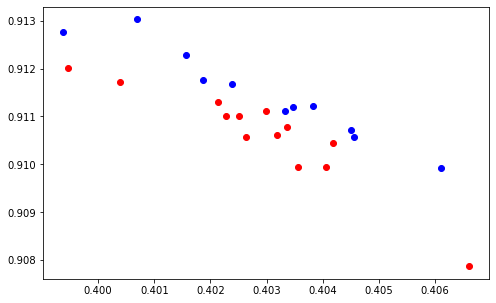

In [475]:
scaler = Normalizer()
data3 =  data[(data['RIG_STATE']==7)|(data['RIG_STATE']==1)]

#data2 =  data2[data2['hole']=="255"]  #204/ 210ST2 (+) / 234ST2

#df = data[["HKLD", "STOR", "FLWI", "RPM", "SPPA", "ECD", 
      #      "APRS", "BVEL", "DDEPT", "DHKLD", #"F", "F_all", 
     #         "SPPA_APRS", "DSPPA", "BPOS", "ANOMAL" ]].values

df = data3[[ 'RPM', 'SPPA', "STOR" #'BPOS'
     #  'HKLD', 'STOR', 'FLWI', 'RPM', 'SPPA', 'ECD', 'DLS', 'INCL', 'AZIM',
    #   'GR', 'APRS', 'BVEL', 'RIG_STATE', 'Stick_Slip_Ratio',
     #  'StickPercentage', 'ESD'
          ]].values

scaler.fit(df)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(df)
agg_clustering = AgglomerativeClustering(n_clusters = 2, 
                                         affinity = 'euclidean', linkage = 'ward')
#predicting the labels
labels = agg_clustering.fit_predict(samples_scaled)
plt.figure(figsize = (8,5))
plt.scatter(samples_scaled[labels == 0 , 0] , samples_scaled[labels == 0 , 1] , c = 'red')
plt.scatter(samples_scaled[labels == 1 , 0] , samples_scaled[labels == 1 , 1] , c = 'blue')
plt.scatter(samples_scaled[labels == 2 , 0] , samples_scaled[labels == 2 , 1] , c = 'green')
plt.scatter(samples_scaled[labels == 3 , 0] , samples_scaled[labels == 3 , 1] , c = 'black')
plt.scatter(samples_scaled[labels == 4 , 0] , samples_scaled[labels == 4 , 1] , c = 'yellow')
plt.show()

In [476]:
# считаем кол-во Аварий:
len(samples_scaled[labels == 1])

11

In [477]:
data1['StuckPipe'] = data1['StuckPipe'].astype(int)
StuckPipe = data1['StuckPipe'].values

dff = pd.DataFrame({'labels': labels,
'StuckPipe': StuckPipe})
dff.head()

<ipython-input-477-87e10b228683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['StuckPipe'] = data1['StuckPipe'].astype(int)


,labels,StuckPipe
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0


In [478]:
# посмотрим насколько совпала кластеризация с разметкой StuckPipe:
ct = pd.crosstab(labels,data1['StuckPipe'])
print(ct)

StuckPipe   0  1
row_0           
0          12  1
1          10  1
